<h3>Marcação POS, lematização, stemização</h3>

In [72]:
#%pip install bs4
#%pip install urllib
#%pip install nltk
#%pip install spacy
#%pip install matplotlib
#%pip install wordcloud

In [73]:
import bs4 as bs
import urllib.request
import nltk
import spacy

<h4>POS</h5>

In [74]:
pln = spacy.load('pt_core_news_sm')
pln

In [75]:
documento = pln('Estou aprendendo processamento de linguagem natural')

for token in documento:
    print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ


<h4>Lematização e stemização</h5>

In [76]:
for token in documento:
    print(token.text, token.lemma_)

Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural


In [77]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')

[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'curso',
 'cursar']

In [78]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\andpf\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [79]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [80]:
for token in documento:
    print(token.text, token.lemma_, stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur


<h4>Carregamento de textos</h5>

In [81]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')

In [82]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Intelig\xc3\xaancia artificial \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector

In [83]:
dados_html = bs.BeautifulSoup(dados)
dados_html

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Inteligência artificial – Wikipédia, a enciclopédia livre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled ve

In [84]:
paragrafos = dados_html.find_all('p')
paragrafos
paragrafos[0]
paragrafos[1].text

'É um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[2] É possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[2]\n'

In [85]:
conteudo = ''

for p in paragrafos:
    conteudo += p.text

In [86]:
conteudo = conteudo.lower()
conteudo

'inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é um campo de estudo multidisciplinar que abrange varias áreas do conhecimento.[1] embora seu desenvolvimento tenha avançado mais na ciência da computação, sua abordagem interdisciplinar envolve contribuições de diversas disciplinas. algumas das principais áreas relacionadas à ia incluem:\né um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[2] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir aplicar o raciocínio nas situações do nosso cotidiano).[2]\no desenvolvimento da área

<h4>Busca em textos com spaCY</h5>

In [87]:
string = 'turing'
token_pesquisa = pln(string)

In [88]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH', None, token_pesquisa)

In [89]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 3343, 3344),
 (8661325627334373315, 3353, 3354),
 (8661325627334373315, 3509, 3510),
 (8661325627334373315, 3514, 3515),
 (8661325627334373315, 3520, 3521),
 (8661325627334373315, 3583, 3584),
 (8661325627334373315, 4236, 4237),
 (8661325627334373315, 5501, 5502),
 (8661325627334373315, 8952, 8953),
 (8661325627334373315, 9087, 9088),
 (8661325627334373315, 9182, 9183),
 (8661325627334373315, 9299, 9300)]

In [90]:
doc[2323:2324], doc[2323-5:2324+5]

(gerar,
 abordagem cria sistemas que tentam gerar inteligência pela aprendizagem e adaptação)

In [91]:
matches[0], matches[0][1]

((8661325627334373315, 3343, 3344), 3343)

In [92]:
from IPython.core.display import HTML

In [93]:
texto = ''
numero_palavras = 50
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f""" <p><strong>Resultados encontrados:</strong> {len(matches)}</p> """))
for i in matches:
    inicio = i[1] - numero_palavras
    if inicio < 0:
        inicio = 0
    texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark> {string} </mark>")
    texto += "<br /><br />"

display(HTML(f"""... {texto} .... """))

<h4>Extração de entidades nomeadas</h5>


In [94]:
for entidade in doc.ents:
    print(entidade.text, entidade.label_)

cotidiano).[2 LOC
segunda guerra mundial MISC
computing machinery and intelligence MISC
alan turing,[3 PER
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
frankenstein MISC
circulares.[8 PER
prolog MISC
gpt-3[14 MISC
google ORG
wikipédia MISC
john mccarthy PER
racionalmente".[11][18 ORG
aristóteles PER
alexandre PER
herbert simon PER
john mccarthy PER
brasil LOC
allen newell PER
herbert simon PER
mccarty PER
marvin minsky PER
mit ORG
darthmouth LOC
estados unidos LOC
fifth generation MISC
japão LOC
andreas kaplan PER
michael haenlein definem PER
john mccarthy PER
sub-simbólico"?[25 MISC
john haugeland PER
good PER
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac asimov PER
steven spielberg PER
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
turing PER
turing.[31 LOC
joseph weizenbaum PER
mit ORG
a.l.i.c.e MISC
java MISC
int

In [ ]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter=True)

<h4>Nuvem de palavras e stop words</h5>

In [96]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'deverá', 'nunca', 'quinta', 'apoio', 'fora', 'outros', 'coisa', 'todo', 'sexto', 'quais', 'tempo', 'contra', 'próprio', 'oito', 'aqueles', 'aí', 'mas', 'nos', 'poderá', 'nossas', 'dão', 'fomos', 'posso', 'atrás', 'esta', 'vinte', 'alguns', 'cuja', 'dá', 'as', 'desde', 'falta', 'dentro', 'forma', 'lado', 'contudo', 'dar', 'portanto', 'até', 'vêm', 'área', 'sois', 'foste', 'fazeis', 'são', 'ambos', 'da', 'uns', 'estará', 'obrigada', 'fazes', 'bastante', 'porquê', 'tarde', 'também', 'ontem', 'meio', 'dizer', 'desse', 'eles', 'ligado', 'naquela', 'baixo', 'essa', 'inicio', 'mesmo', 'fazemos', 'nesta', 'fostes', 'tiveram', 'elas', 'bom', 'boa', 'quinto', 'sete', 'era', 'conhecido', 'os', 'todos', 'valor', 'uma', 'quero', 'nossos', 'dizem', 'terceira', 'às', 'cujo', 'tuas', 'sistema', 'vão', 'número', 'sou', 'ele', 'sei', 'põe', 'pode', 'estivemos', 'dezanove', 'novas', 'seu', 'te', 'ali', 'muito', 'saber', 'está', 'podia', 'vocês', 'vais', 'comprida', 'apoia', 'teus', 'vários', 'pela', 'n

In [97]:
pln.vocab['se'].is_stop
doc = pln(conteudo)
lista_token = []

for token in doc:
    lista_token.append(token.text)

print(lista_token)

['inteligência', 'artificial', '(', 'de', 'sigla', ':', 'ia', ';', 'do', 'inglês', ':', 'artificial', 'intelligence', ',', 'de', 'sigla', ':', 'ai', ')', 'é', 'um', 'campo', 'de', 'estudo', 'multidisciplinar', 'que', 'abrange', 'varias', 'áreas', 'do', 'conhecimento.[1', ']', 'embora', 'seu', 'desenvolvimento', 'tenha', 'avançado', 'mais', 'na', 'ciência', 'da', 'computação', ',', 'sua', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'de', 'diversas', 'disciplinas', '.', 'algumas', 'das', 'principais', 'áreas', 'relacionadas', 'à', 'ia', 'incluem', ':', '\n', 'é', 'um', 'conceito', 'amplo', 'e', 'que', 'recebe', 'tantas', 'definições', 'quanto', 'significados', 'diferentes', 'à', 'palavra', 'inteligência.[2', ']', 'é', 'possível', 'considerar', 'algumas', 'características', 'básicas', 'desses', 'sistemas', ',', 'como', 'a', 'capacidade', 'de', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'a', 'um', 'conjunto', 'de', 'dados', 'disponíveis', 'para', 'chegar', 'a', 'um

In [98]:
sem_stop = []

for palavra in lista_token:
    if pln.vocab[palavra].is_stop == False:
        sem_stop.append(palavra)

In [99]:
print(sem_stop)

['inteligência', 'artificial', '(', 'sigla', ':', 'ia', ';', 'inglês', ':', 'artificial', 'intelligence', ',', 'sigla', ':', 'ai', ')', 'campo', 'estudo', 'multidisciplinar', 'abrange', 'varias', 'áreas', 'conhecimento.[1', ']', 'desenvolvimento', 'tenha', 'avançado', 'ciência', 'computação', ',', 'abordagem', 'interdisciplinar', 'envolve', 'contribuições', 'diversas', 'disciplinas', '.', 'principais', 'áreas', 'relacionadas', 'ia', 'incluem', ':', '\n', 'conceito', 'amplo', 'recebe', 'tantas', 'definições', 'significados', 'diferentes', 'palavra', 'inteligência.[2', ']', 'considerar', 'características', 'básicas', 'desses', 'sistemas', ',', 'capacidade', 'raciocínio', '(', 'aplicar', 'regras', 'lógicas', 'conjunto', 'dados', 'disponíveis', 'chegar', 'conclusão', ')', ',', 'aprendizagem', '(', 'aprender', 'erros', 'acertos', 'futuro', 'possa', 'agir', 'maneira', 'eficaz', ')', ',', 'reconhecer', 'padrões', '(', 'padrões', 'visuais', 'sensoriais', ',', 'padrões', 'comportamento', ')', '

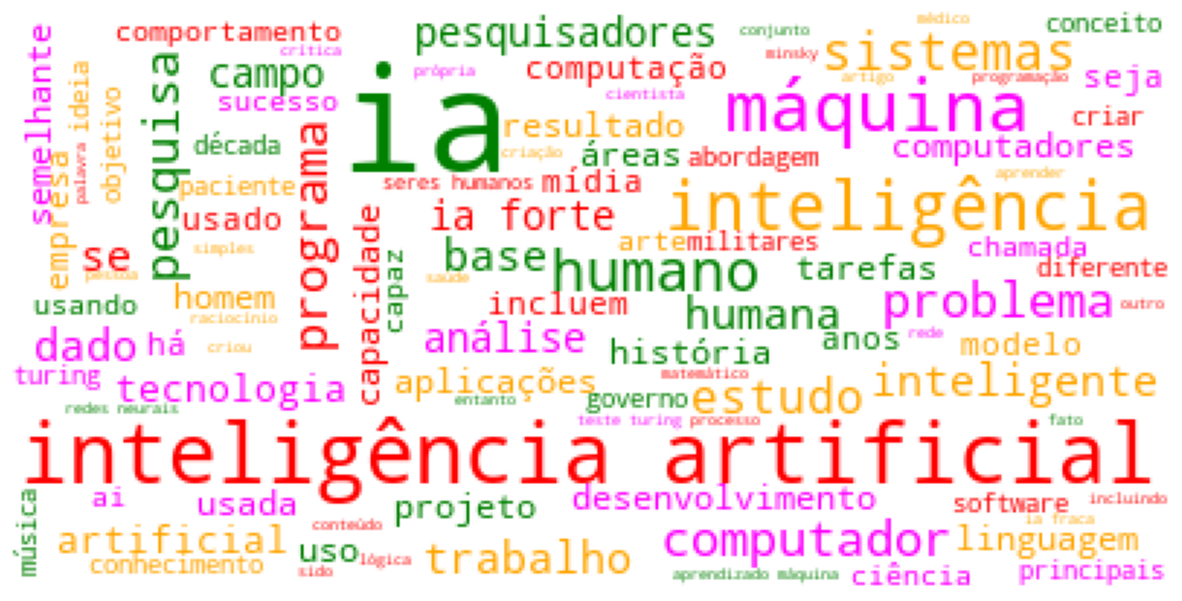

In [102]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

from wordcloud import WordCloud
cloud = WordCloud(background_color= 'white', max_words=100, colormap=color_map)

import matplotlib.pyplot as plt

cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()